Dataset loaded successfully!
Filtered data for: Vadodara, Ahmedabad, Surat
Cities found in the dataset: ['Ahmedabad']
Missing values handled using forward and backward fill.
Created 'Year', 'Month', and 'Month_Name' columns.

Data Wrangling Complete. Here's a sample of the cleaned data:
        City       Date  PM2.5    PM10     NO    NO2    NOx  NH3     CO  \
0  Ahmedabad 2015-01-01  73.24  141.54   0.92  18.22  17.15  NaN   0.92   
1  Ahmedabad 2015-01-02  73.24  141.54   0.97  15.69  16.46  NaN   0.97   
2  Ahmedabad 2015-01-03  73.24  141.54  17.40  19.30  29.70  NaN  17.40   
3  Ahmedabad 2015-01-04  73.24  141.54   1.70  18.48  17.97  NaN   1.70   
4  Ahmedabad 2015-01-05  73.24  141.54  22.10  21.42  37.76  NaN  22.10   

     SO2      O3  Benzene  Toluene  Xylene    AQI AQI_Bucket  Year  Month  \
0  27.64  133.36     0.00     0.02    0.00  209.0        NaN  2015      1   
1  24.55   34.06     3.68     5.50    3.77  209.0        NaN  2015      1   
2  29.07   30.70     6.80    1

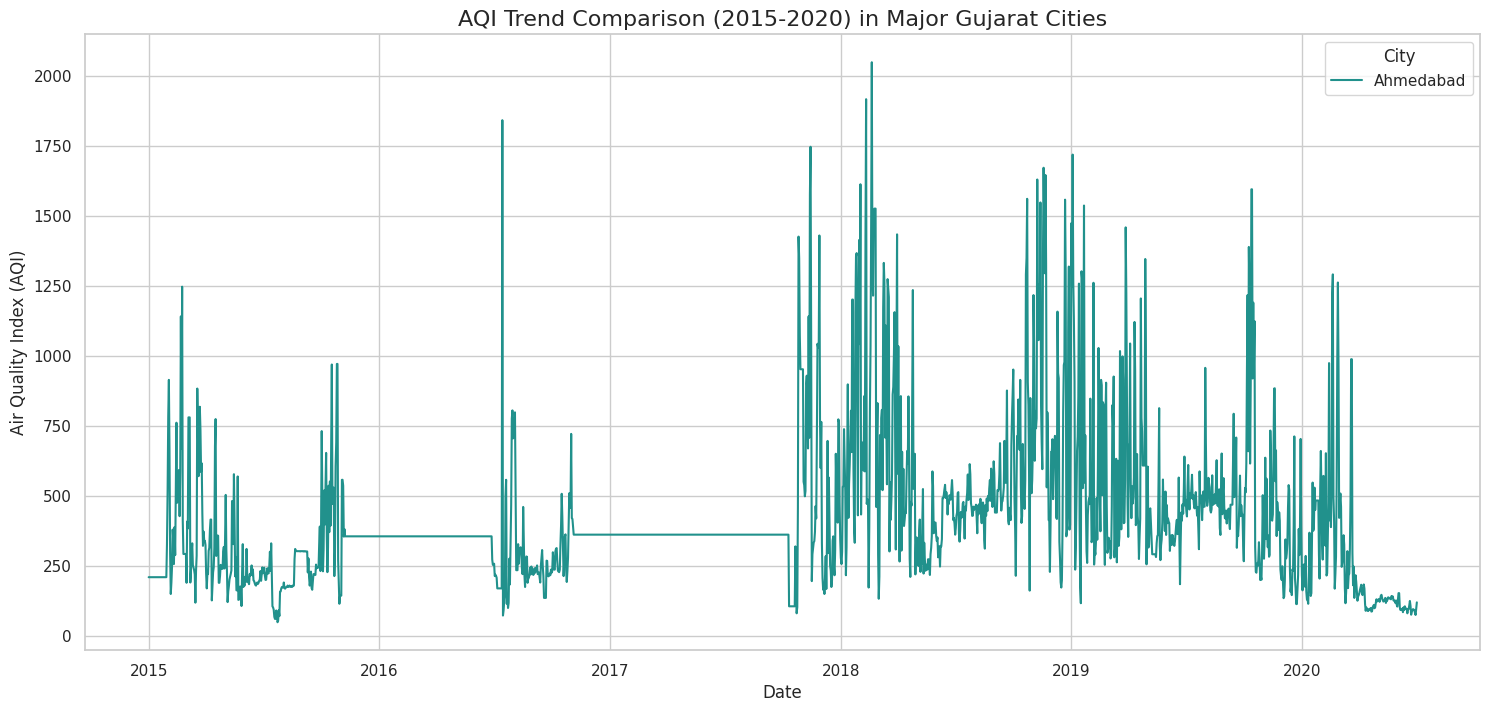

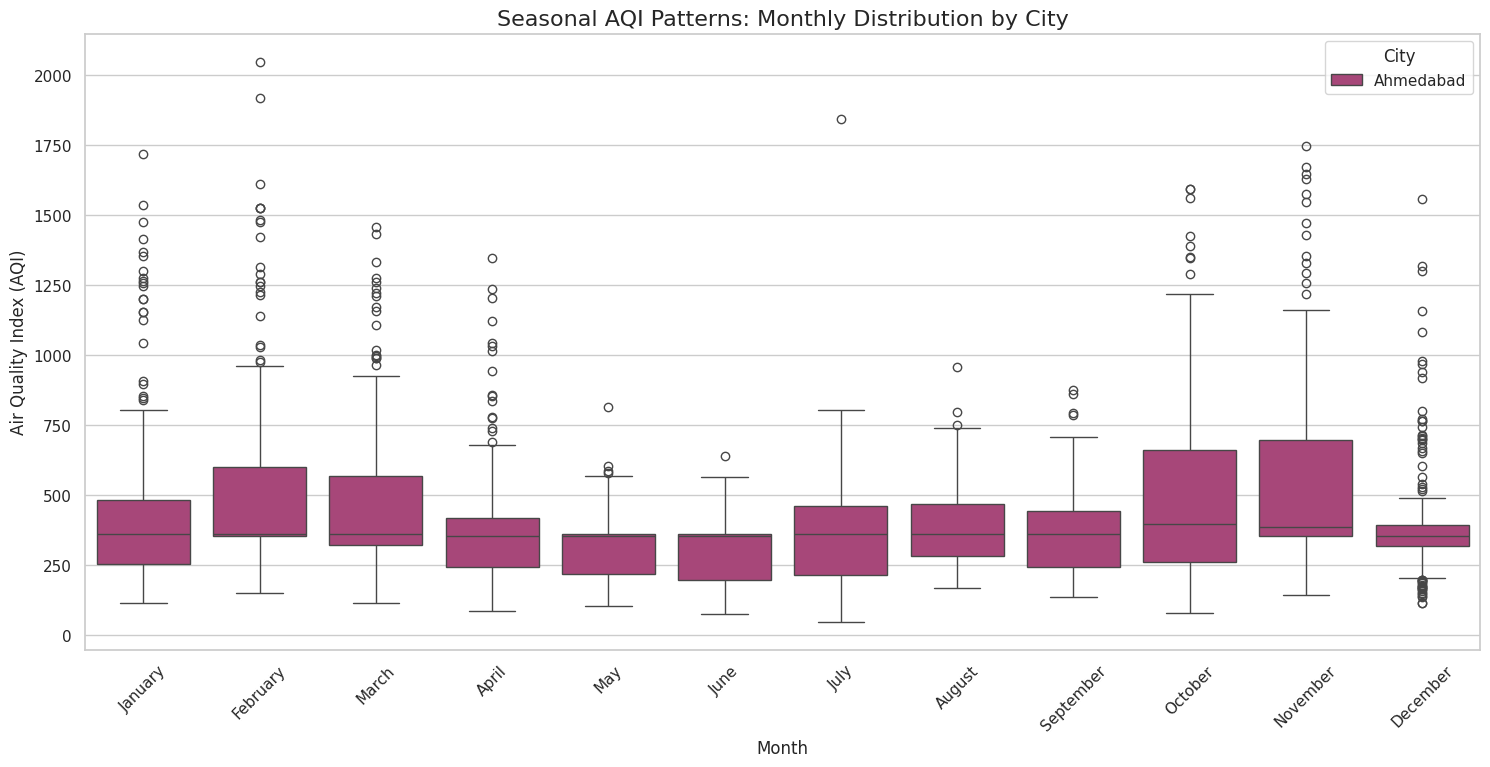

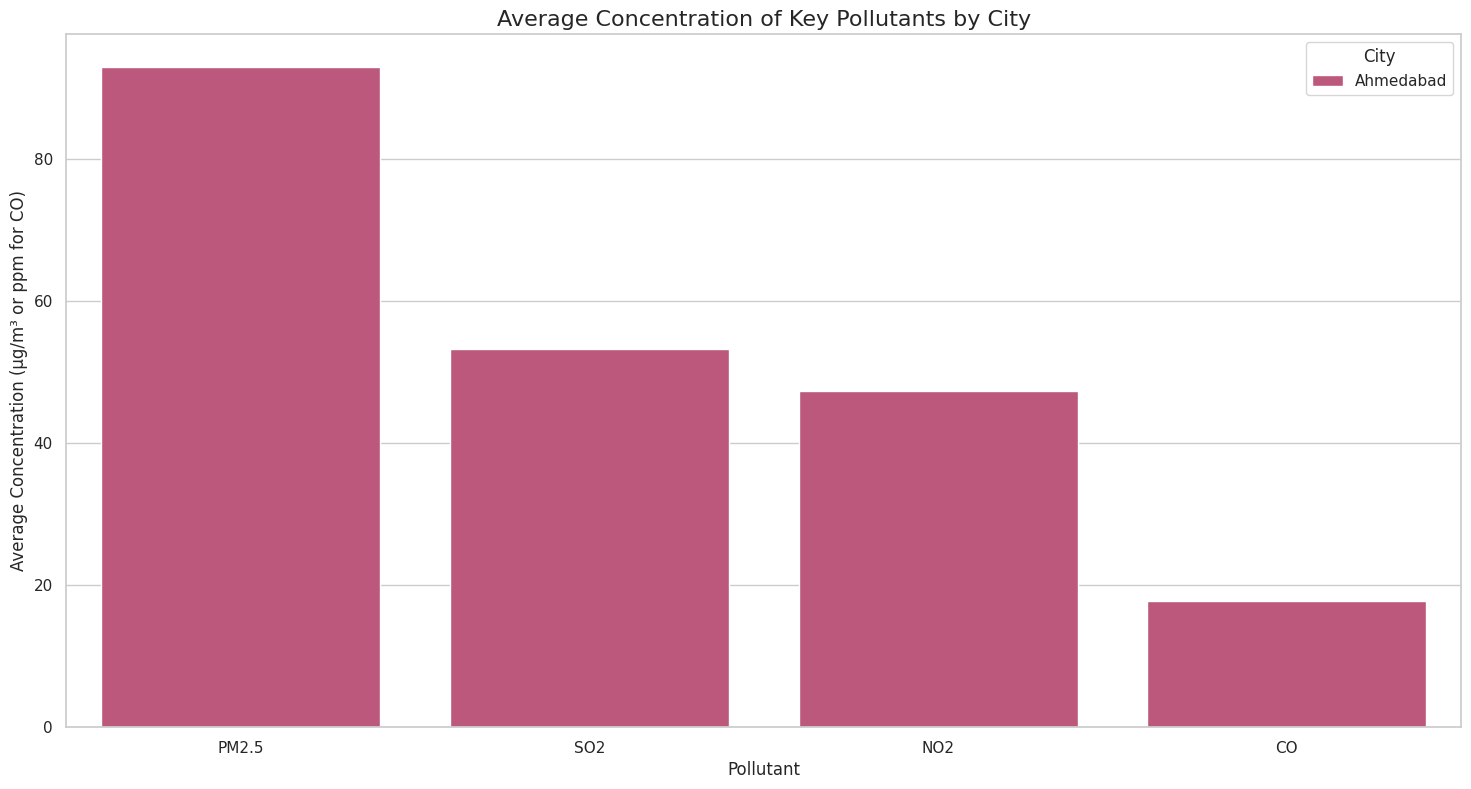


--- Starting Week 3: Focused Analysis ---

Could not generate Vadodara heatmap: No data available for Vadodara after pivoting.
This might indicate sparse or missing AQI data for the city in the dataset.

Impact of Lockdown (April-May 2020 vs 2019):

        City    AQI_2019    AQI_2020  AQI_Change  AQI_Change_Percent
0  Ahmedabad  510.098361  124.770492 -385.327869          -75.539915


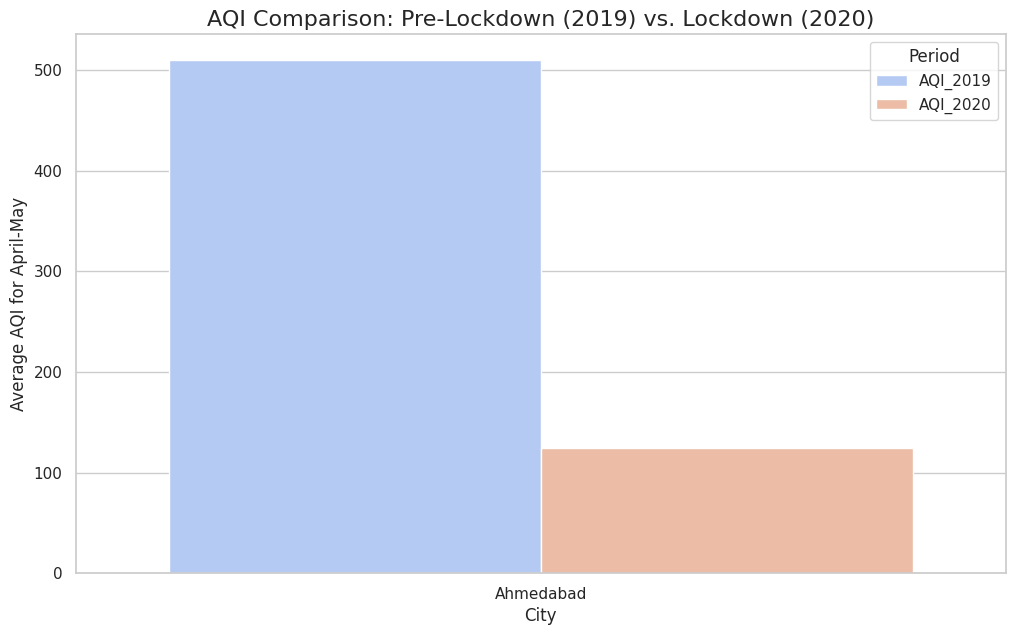


--- Project Analysis Complete ---
You can now use these charts and findings for your Week 4 report and presentation.


In [4]:
# Gujarat Cities Air Quality (AQI) Analysis
# A project to analyze and compare AQI trends in Vadodara, Ahmedabad, and Surat.
# ---

# Week 1: Setup and Data Wrangling

# 1.1: Import necessary Python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# 1.2: Set up the visual style for our plots
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (15, 8)

# ---
# IMPORTANT: Before you run this, make sure the 'city_day.csv' file is in the same directory
# as your notebook, or provide the full path to the file.
# You can download the dataset from: https://www.kaggle.com/datasets/rohanrao/air-quality-data-in-india
# ---

# 1.3: Load the dataset
try:
    df_raw = pd.read_csv('city_day.csv')
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print("Error: 'city_day.csv' not found.")
    print("Please download the dataset from Kaggle and place it in the correct directory.")
    # Create a dummy dataframe to prevent further errors in the script
    df_raw = pd.DataFrame()

if not df_raw.empty:
    # 1.4: Filter the data for the cities we are interested in
    cities_of_interest = ['Vadodara', 'Ahmedabad', 'Surat']
    df_cities = df_raw[df_raw['City'].isin(cities_of_interest)].copy()
    print(f"Filtered data for: {', '.join(cities_of_interest)}")

    # --- Debugging Step: Check which cities were actually found ---
    found_cities = df_cities['City'].unique()
    print(f"Cities found in the dataset: {list(found_cities)}")
    if len(found_cities) < len(cities_of_interest):
        missing_cities = set(cities_of_interest) - set(found_cities)
        print(f"Warning: Data for the following cities was not found: {list(missing_cities)}")
    # ----------------------------------------------------------------

    # 1.5: Clean the data
    # Convert 'Date' column to datetime objects
    df_cities['Date'] = pd.to_datetime(df_cities['Date'])

    # Sort by City and Date to ensure forward-fill works correctly
    df_cities.sort_values(['City', 'Date'], inplace=True)

    # Handle missing values using forward-fill (ffill)
    # This is a good strategy for time-series data like air quality.
    pollutants = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI']
    for pollutant in pollutants:
        df_cities[pollutant] = df_cities.groupby('City')[pollutant].transform(lambda x: x.ffill())

    # Some values might be missing at the start, we can back-fill them too
    for pollutant in pollutants:
        df_cities[pollutant] = df_cities.groupby('City')[pollutant].transform(lambda x: x.bfill())

    print("Missing values handled using forward and backward fill.")

    # 1.6: Create new columns for easier analysis
    df_cities['Year'] = df_cities['Date'].dt.year
    df_cities['Month'] = df_cities['Date'].dt.month
    df_cities['Month_Name'] = df_cities['Date'].dt.strftime('%B')

    print("Created 'Year', 'Month', and 'Month_Name' columns.")
    print("\nData Wrangling Complete. Here's a sample of the cleaned data:")
    print(df_cities.head())


    # ---
    # Week 2: Exploratory Data Analysis (EDA)
    # ---

    print("\n--- Starting Week 2: Exploratory Data Analysis ---")

    # 2.1: Overall AQI Trends (2015-2020)
    plt.figure(figsize=(18, 8))
    sns.lineplot(data=df_cities, x='Date', y='AQI', hue='City', palette='viridis')
    plt.title('AQI Trend Comparison (2015-2020) in Major Gujarat Cities', fontsize=16)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Air Quality Index (AQI)', fontsize=12)
    plt.legend(title='City')
    plt.show()

    # 2.2: Seasonal Patterns (Monthly AQI Distribution)
    plt.figure(figsize=(18, 8))
    # Order months correctly for plotting
    month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
    sns.boxplot(data=df_cities, x='Month_Name', y='AQI', hue='City', order=month_order, palette='magma')
    plt.title('Seasonal AQI Patterns: Monthly Distribution by City', fontsize=16)
    plt.xlabel('Month', fontsize=12)
    plt.ylabel('Air Quality Index (AQI)', fontsize=12)
    plt.xticks(rotation=45)
    plt.legend(title='City')
    plt.show()

    # 2.3: Pollutant Analysis (Average Levels)
    # We will focus on the most common and impactful pollutants
    key_pollutants = ['PM2.5', 'SO2', 'NO2', 'CO']
    df_pollutant_avg = df_cities.groupby('City')[key_pollutants].mean().reset_index()

    # Melt the dataframe for easier plotting with seaborn
    df_melted = df_pollutant_avg.melt(id_vars='City', var_name='Pollutant', value_name='Average Concentration')

    plt.figure(figsize=(18, 9))
    sns.barplot(data=df_melted, x='Pollutant', y='Average Concentration', hue='City', palette='plasma')
    plt.title('Average Concentration of Key Pollutants by City', fontsize=16)
    plt.xlabel('Pollutant', fontsize=12)
    plt.ylabel('Average Concentration (µg/m³ or ppm for CO)', fontsize=12)
    plt.legend(title='City')
    plt.show()


    # ---
    # Week 3: Focused Analysis & Visualization
    # ---

    print("\n--- Starting Week 3: Focused Analysis ---")

    # 3.1: Vadodara Deep Dive - AQI Heatmap
    df_vadodara = df_cities[df_cities['City'] == 'Vadodara']
    month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

    # Create a pivot table for the heatmap
    vadodara_heatmap_data = df_vadodara.pivot_table(values='AQI', index='Month_Name', columns='Year', aggfunc='mean')

    # Check if the resulting pivot table is not empty and has data
    if not vadodara_heatmap_data.empty and not vadodara_heatmap_data.isnull().all().all():
        vadodara_heatmap_data = vadodara_heatmap_data.reindex(month_order) # Sort months chronologically

        plt.figure(figsize=(14, 9))
        sns.heatmap(vadodara_heatmap_data, cmap='YlOrRd', annot=True, fmt=".0f", linewidths=.5)
        plt.title('Vadodara: Average Monthly AQI (2015-2020)', fontsize=16)
        plt.xlabel('Year', fontsize=12)
        plt.ylabel('Month', fontsize=12)
        plt.show()
    else:
        print("\nCould not generate Vadodara heatmap: No data available for Vadodara after pivoting.")
        print("This might indicate sparse or missing AQI data for the city in the dataset.")


    # 3.2: Event Impact Analysis - 2020 Lockdown vs. 2019
    # Hypothesis: AQI in April-May 2020 was lower than in April-May 2019.
    lockdown_period_2020 = df_cities[(df_cities['Date'] >= '2020-04-01') & (df_cities['Date'] <= '2020-05-31')]
    same_period_2019 = df_cities[(df_cities['Date'] >= '2019-04-01') & (df_cities['Date'] <= '2019-05-31')]

    # Calculate average AQI for each city in both periods
    avg_aqi_2020 = lockdown_period_2020.groupby('City')['AQI'].mean().reset_index().rename(columns={'AQI': 'AQI_2020'})
    avg_aqi_2019 = same_period_2019.groupby('City')['AQI'].mean().reset_index().rename(columns={'AQI': 'AQI_2019'})

    # Merge the data for comparison
    if not avg_aqi_2019.empty and not avg_aqi_2020.empty:
        comparison_df = pd.merge(avg_aqi_2019, avg_aqi_2020, on='City')
        comparison_df['AQI_Change'] = comparison_df['AQI_2020'] - comparison_df['AQI_2019']
        comparison_df['AQI_Change_Percent'] = (comparison_df['AQI_Change'] / comparison_df['AQI_2019']) * 100

        print("\nImpact of Lockdown (April-May 2020 vs 2019):\n")
        print(comparison_df)

        # Visualize the comparison
        comparison_melted = comparison_df[['City', 'AQI_2019', 'AQI_2020']].melt(id_vars='City', var_name='Period', value_name='Average AQI')

        plt.figure(figsize=(12, 7))
        sns.barplot(data=comparison_melted, x='City', y='Average AQI', hue='Period', palette='coolwarm')
        plt.title('AQI Comparison: Pre-Lockdown (2019) vs. Lockdown (2020)', fontsize=16)
        plt.xlabel('City', fontsize=12)
        plt.ylabel('Average AQI for April-May', fontsize=12)
        plt.legend(title='Period')
        plt.show()
    else:
        print("\nCould not generate Lockdown comparison: Data missing for one or both periods.")


    print("\n--- Project Analysis Complete ---")
    print("You can now use these charts and findings for your Week 4 report and presentation.")

